# Deeplearning from scratch

source : https://www.youtube.com/watch?v=5TpBe7KTAHE&list=PLO_fdPEVlfKoanjvTJbIbd9V5d9Pzp8Rw&index=5

## 1er neurone simple, fonction d'activation sigmoïde

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

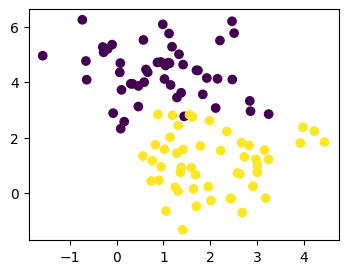

In [57]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape((y.shape[0],1))
plt.figure(figsize=(4,3))
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

In [58]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [59]:
W,b = initialisation(X)

### Modèle : 

In [60]:
def model(X,W,b):
    Z = X.dot(W) + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [61]:
print(W.shape)
print(b.shape)

(2, 1)
(1,)


In [62]:
A = model(X,W,b)
A.shape

(100, 1)

### Fonction Log-Loss : &nbsp; &nbsp; &nbsp; $$\normalsize L=-\dfrac{1}{m} \sum_{i=0}^{m} y_i log(a_i) + (1-y_i) log(1-a_i) $$

In [63]:
def log_loss(A,y):
    L = (-1/A.shape[0]) * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))
    return L

In [64]:
L = log_loss(A,y)
L

2.5866480096675377

### Le calcul des gradients : 
$$\Large 
\left\{
    \begin{array}{ll}
        \frac{\partial L}{\partial W} = \frac{1}{m} X^T . (A-y) \\
        \frac{\partial L}{\partial b} = \frac{1}{m} \sum_{} (A-y)
    \end{array}
\right. 
$$

In [65]:
def gradients(X,A,y):
    dW = (1/X.shape[0])*np.dot(X.T,(A - y)) 
    db = (1/X.shape[0]) * np.sum(A - y)
    return dW, db

### Fonction de prédiction : on retourne 1 lorsque la fonction d'activation retourne un nombre >= 0.5, 0 sinon

In [66]:
def predict(X,W,b):
    A = model(X,W,b)
    return A >= 0.5

### Descente de gradient

In [67]:
from sklearn.metrics import accuracy_score

def neuron(X,y, learning_rate=0.1, n_epochs=100):
    
    W, b = initialisation(X)
    Loss = np.zeros(len(range(n_epochs)))
    
    for i in range(n_epochs):
        A = model(X,W,b)
        #calcul des gradients:
        dW, db = gradients(X,A,y)
        #update des gradients:
        W -= learning_rate * dW
        b -= learning_rate * db
        #calcul du coût:
        Loss[i] = log_loss(A,y)
    
    y_pred = predict(X,W,b)
    print(f"accuracy score : {accuracy_score(y,y_pred)}")
    
    return W,b,Loss

In [68]:
Wfinal,bfinal,Lossfinal = neuron(X,y)

accuracy score : 0.89


W final : [[ 1.35525612 -1.03265063]],
b final : [0.26870165]


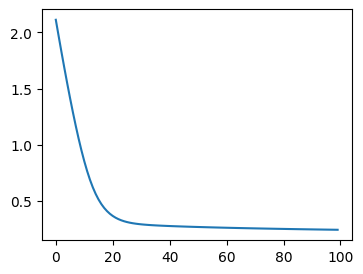

In [69]:
print(f"W final : {Wfinal.T},\nb final : {bfinal}")
plt.figure(figsize=(4,3))
plt.plot(range(100),Lossfinal)
plt.show()

### On veut tracer la frontière de décision $\Longleftrightarrow$ lorsque z=0 
$$\begin{align*} 
& \large z(x_1,x_2) = 0 \\
& \large \Longleftrightarrow w_1.x_1 + w_2.x_2 + b = 0 \\
& \large \Longleftrightarrow x_2 = b - \frac{w_1.x_1}{w_2}
\end{align*} 
$$

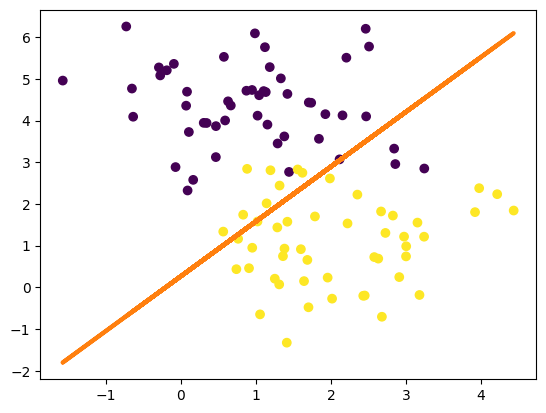

In [108]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(X[:,0],bfinal-(Wfinal[0]*X[:,0])/Wfinal[1],c='C1',lw=3)
plt.plot()
plt.show()

In [121]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter3d( 
    x=X[:, 0].flatten(),
    y=X[:, 1].flatten(),
    z=y.flatten(),
    mode='markers',
    marker=dict(
        size=5,
        color=y.flatten(),                
        colorscale='YlGn',  
        opacity=0.8,
        reversescale=True
    )
)])

fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
#fig.show()

# fonction Z de forme sigmoïde
X0 = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
X1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
xx0, xx1 = np.meshgrid(X0, X1)
Z = Wfinal[0] * xx0 + Wfinal[1] * xx1 + bfinal
A = 1 / (1 + np.exp(-Z))

fig = (go.Figure(data=[go.Surface(z=A, x=xx0, y=xx1, colorscale='YlGn', opacity = 0.7, reversescale=True)]))

fig.add_scatter3d(x=X[:, 0].flatten(), y=X[:, 1].flatten(), z=y.flatten(), mode='markers', marker=dict(size=5, color=y.flatten(), colorscale='YlGn', opacity = 0.9, reversescale=True))


fig.update_layout(template= "plotly_dark", margin=dict(l=0, r=0, b=0, t=0))
fig.layout.scene.camera.projection.type = "orthographic"
fig.show()